# 3 word2vec

## 3.1 추론 기반 기법과 신경망

단어를 벡터로 표현하는 방법에는 크게 '**통계 기반 기법**'과 '**추론 기반 기법**'이 있다. 이 중에서 추론 기반 기법을 사용하여 단어를 벡터로 표현하는 방법을 'word2vec'이라고 한다. word2vec은 **신경망을 사용하여 단어를 벡터**로 표현하는 방법이다.

### 3.1.1 통계 기반 기법의 문제점

통계 기반 기법은 주변 단어의 빈도를 기초로 단어를 표현한다.

구체적으로 단어의 동시발생 행렬을 만들고 그 행렬에 SVD를 적용하여 밀집벡터로 변환한다.
하지만 이 방법은 대규모 말뭉치를 다룰 때 문제가 발생한다. 행렬의 크기가 매우 커지기 때문이다.

추론 기반 기법은 이러한 문제를 해결할 수 있다.

### 3.1.2 추론 기반 기법 개요

추론 기반 기법은 '주변 단어'가 주어졌을 때 '타깃 단어'를 추측하는 작업을 수행한다.

이러한 작업을 수행하는 신경망을 '추론 기반 기법'이라고 한다.

$$
\begin{align*}
\text{입력} & : \text{주변 단어} \\
\text{출력} & : \text{타깃 단어}
\end{align*}
$$

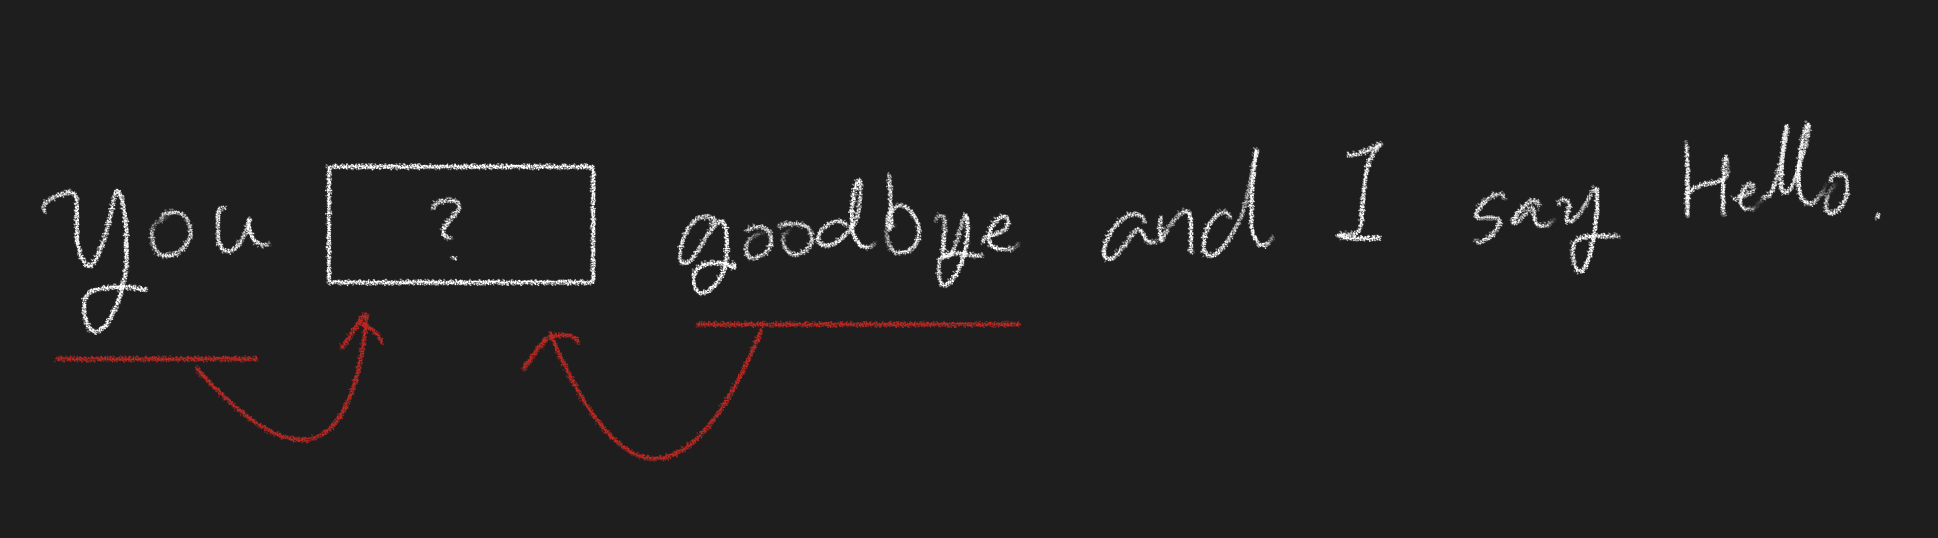

모델 관점에서의 추론 문제

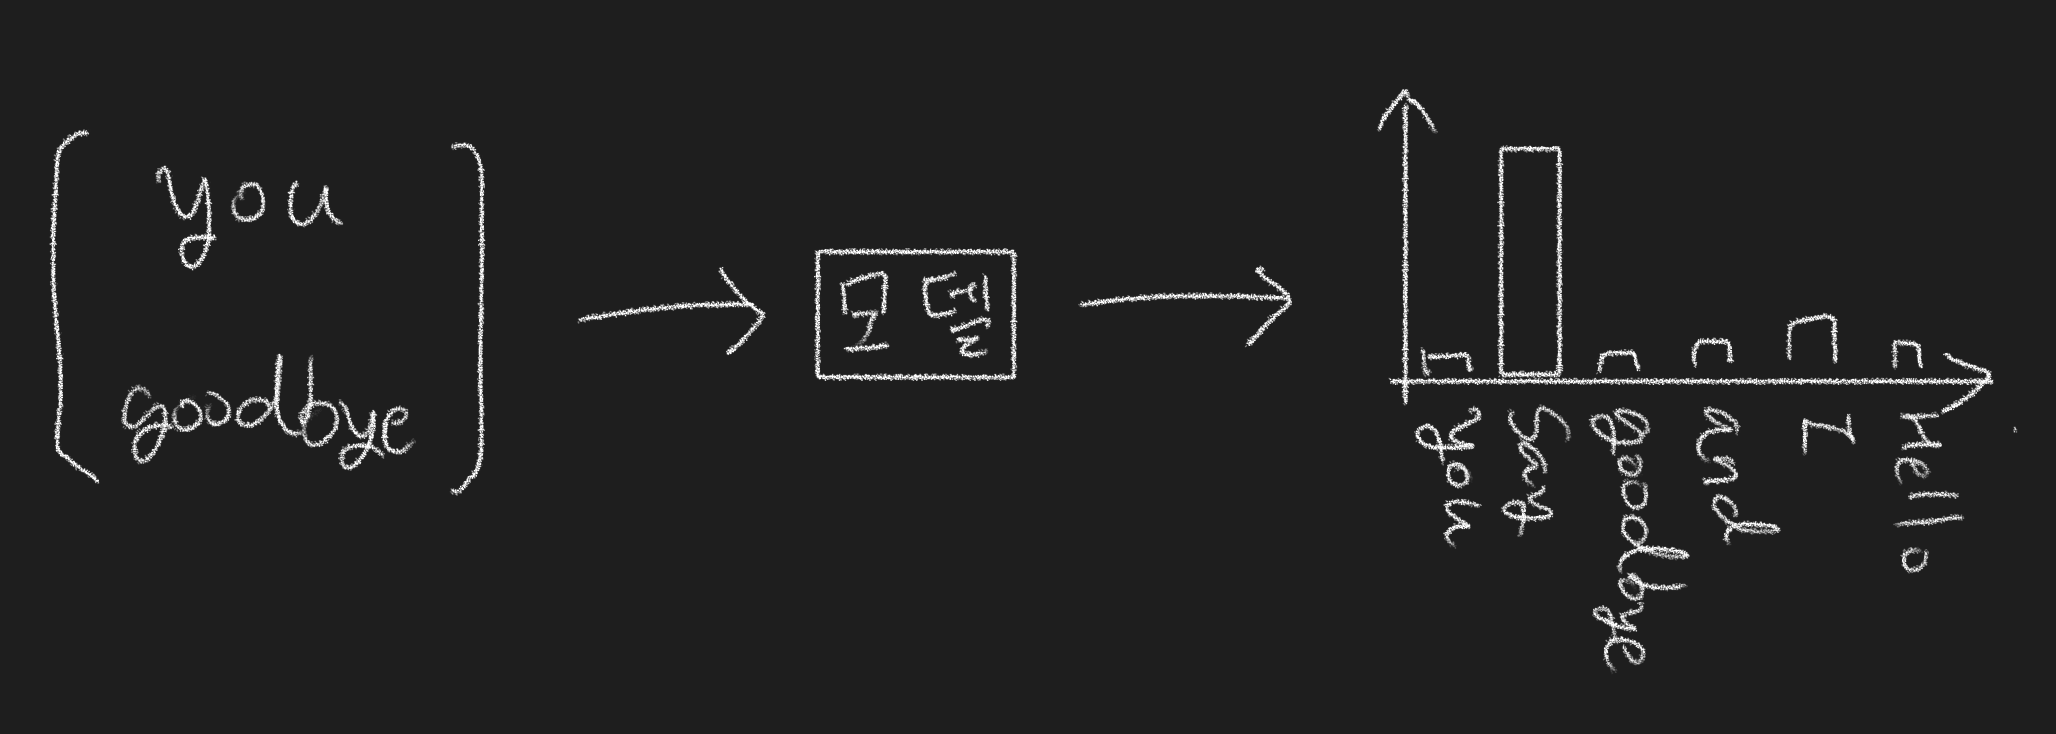

그림처럼 보인다. 추론 기반 기법에는 어떠한 모델이 등장하며 이 모델로 신경망을 사용한다.
모델은 맥락 정보를 입력받아 출현할 수 있는 각 단어의 출현 확률을 출력한다.
이러한 틀 안에서 말뭉치를 사용해 모델이 올바른 추축을 할 수 있도록 학습시킨다.
학습한 결과로 단어의 분산 표현을 얻을 수 있다.


### 3.1.3 신경망에서의 단어 처리

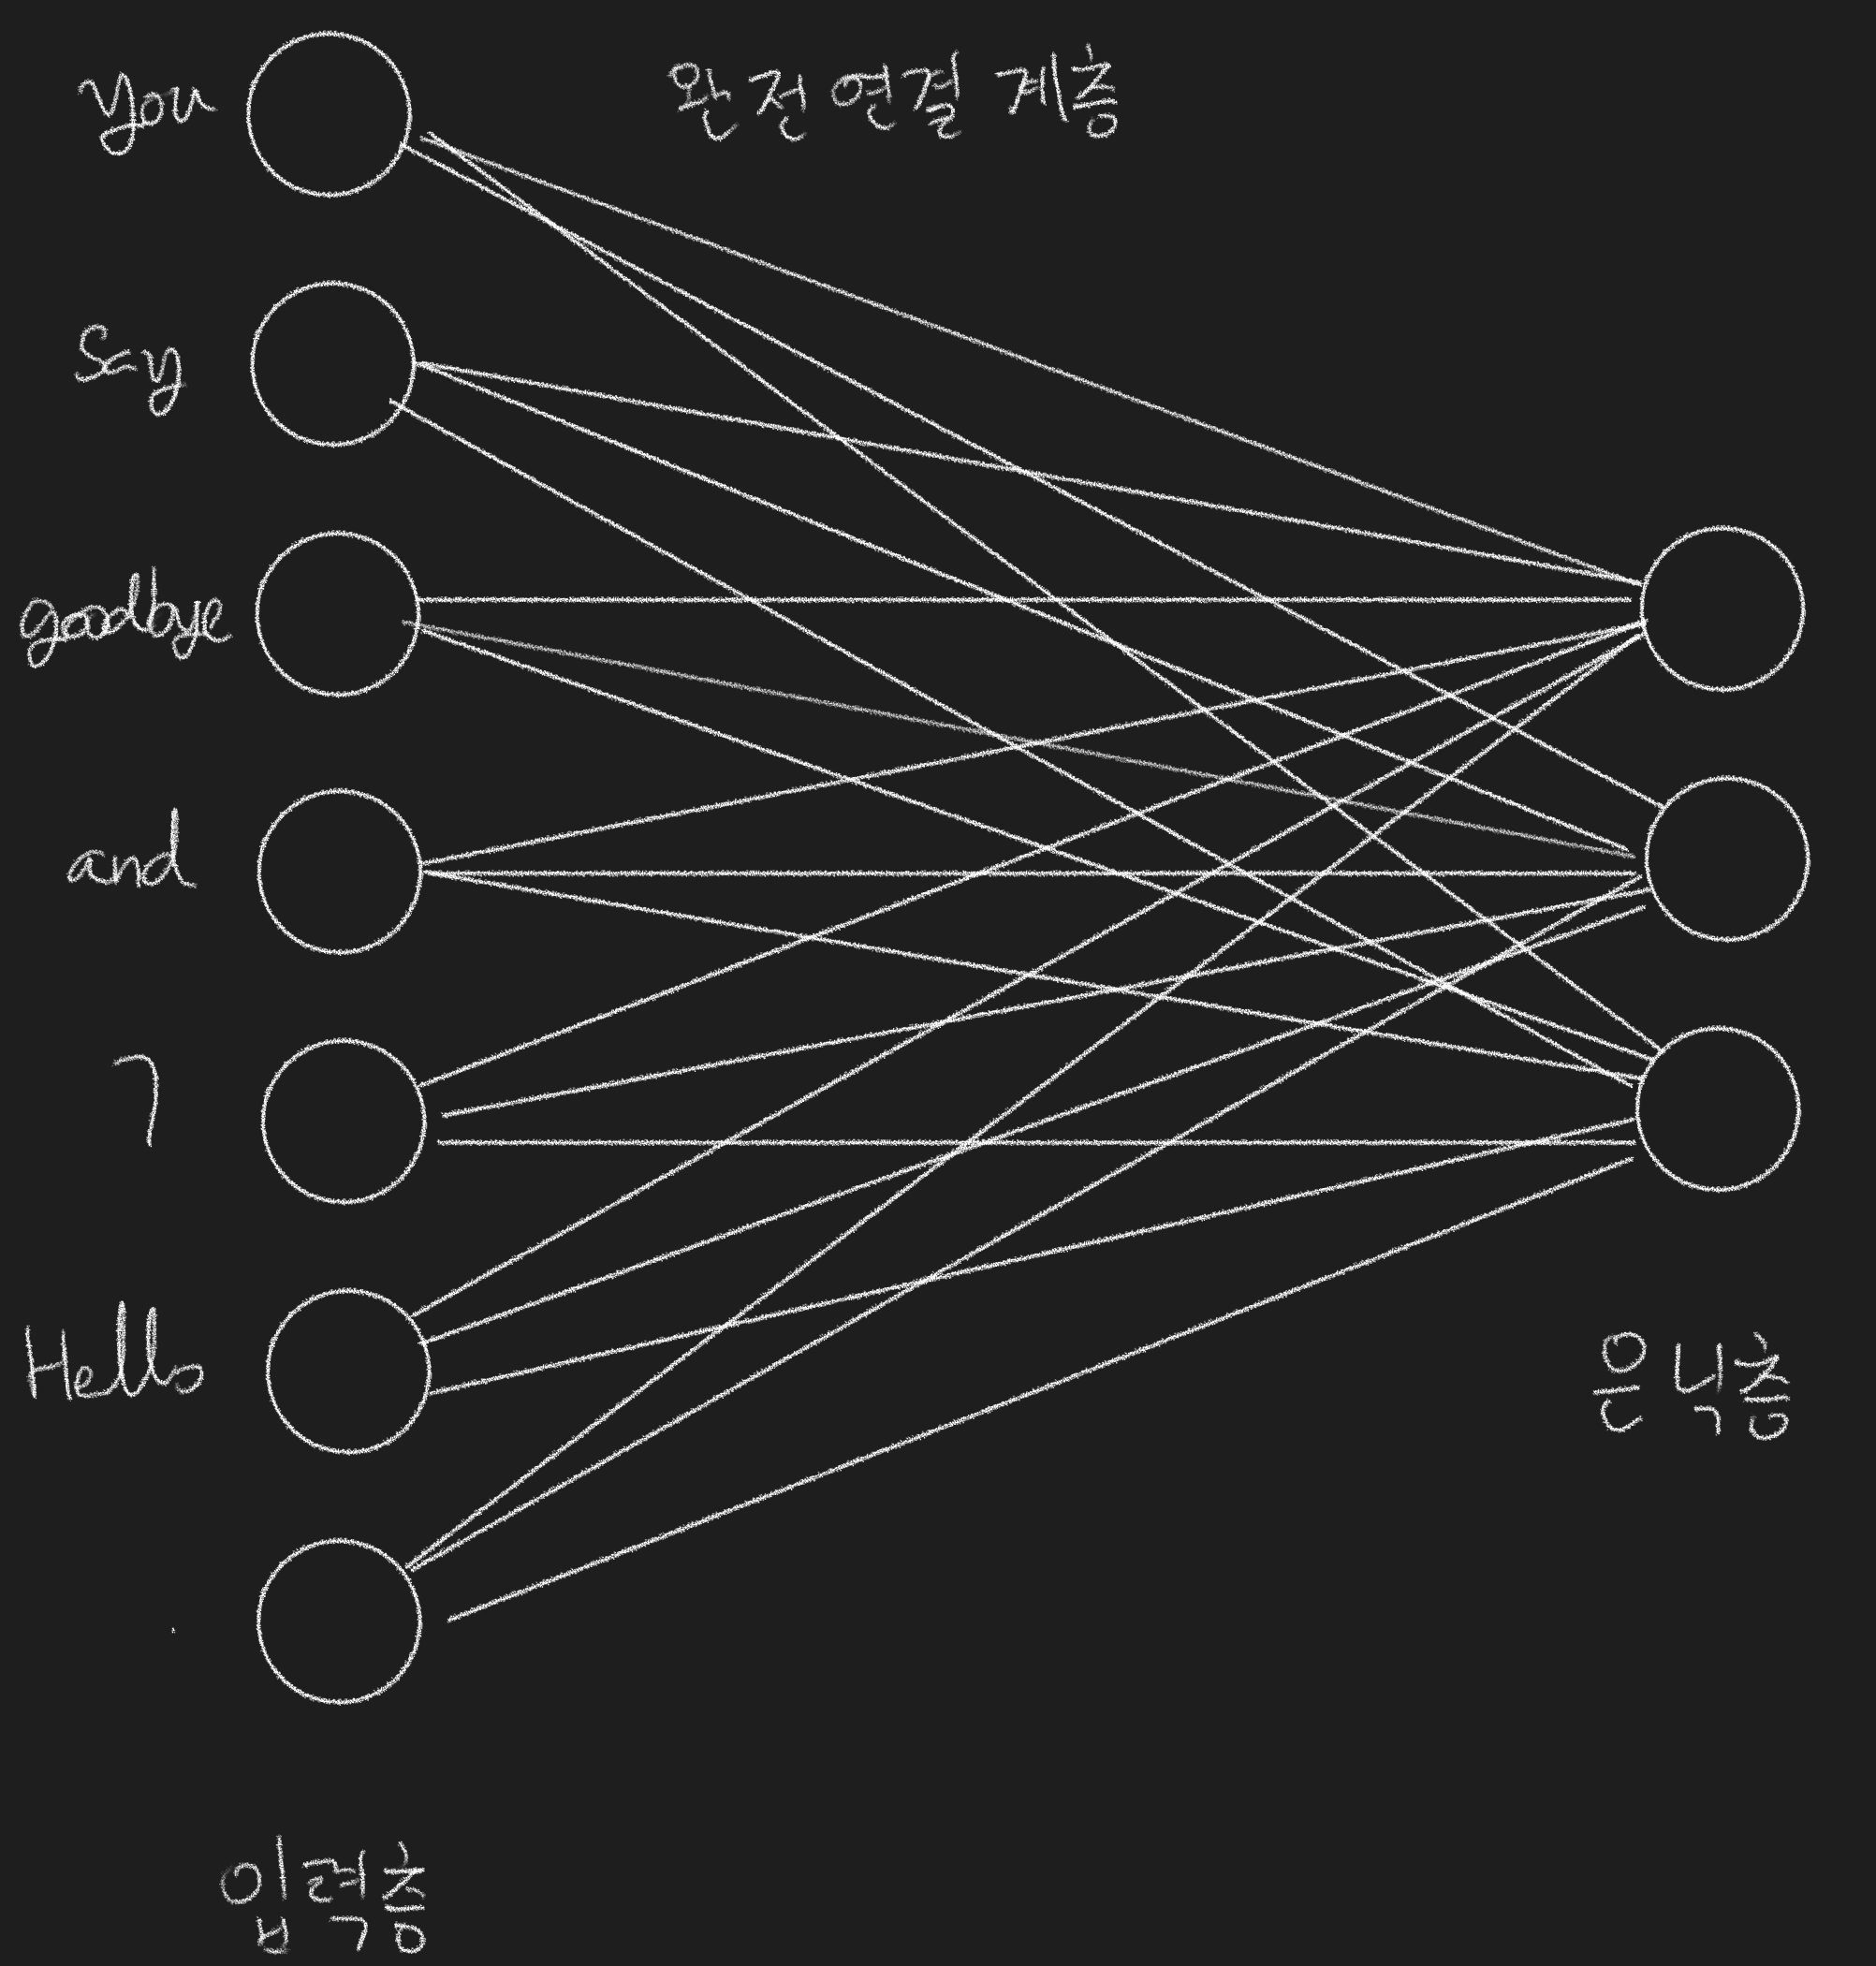

신경망은 단어를 '고정 길이의 밀집 벡터'로 변환한다. (원-핫 인코딩을 사용하여 단어를 벡터로 변환하는 것과 대조된다.)

총 어휘 수만큼 원소를 갖는 벡터를 준비하고 인덱스가 단어 ID에 해당하는 원소만 1이고 나머지는 0인 벡터로 변환한다.

이러한 변환을 '단어 임베딩'이라고 한다.

**완전 연결 계층에 의한 변환**

In [1]:
import numpy as np
c = np.array([1, 0, 0, 0, 0, 0, 0]) # 入力
W = np.random.rand(7, 3)            # 重み
h = np.dot(c, W)                  # 中間ノード
print(h)

[0.6616481  0.78559445 0.81141933]


위 코드는 단어 ID가 0인 단어를 원핫 표현으로 표현한 다음 완전연결계층을 통과시켜 변환 하는 것이다.

완전연결계층의 계산은 행렬 곱으로 수행할 수 있고 행렬 곱은 넘파이의 `np.matmul()`함수로 수행할 수 있다.

코드에서 주목할 곳은 `c`와 `w`의 행렬 곱 부분이다. c는 원핫 표현이므로 단어ID에 대응하는 원소만1이고 그외에는 0인 벡터이다. 따라서 `c`와 `w`의 행렬 곱은 사실상 W_in의 행벡터 중 하나를 '뽑아낸'것과 같다.

## 3.2 단순한 word2vec

word2vec은 '추론 기반 기법'을 사용하여 단어를 벡터로 표현한다.

### 3.2.1 CBOW 모델의 추론 처리

CBOW(Continuous Bag of Words) 모델은 주변 단어로부터 타깃 단어를 추측하는 용도의 신경망이다. CBOW모델의 입력은 맥락이고 출력은 타깃 단어이다.

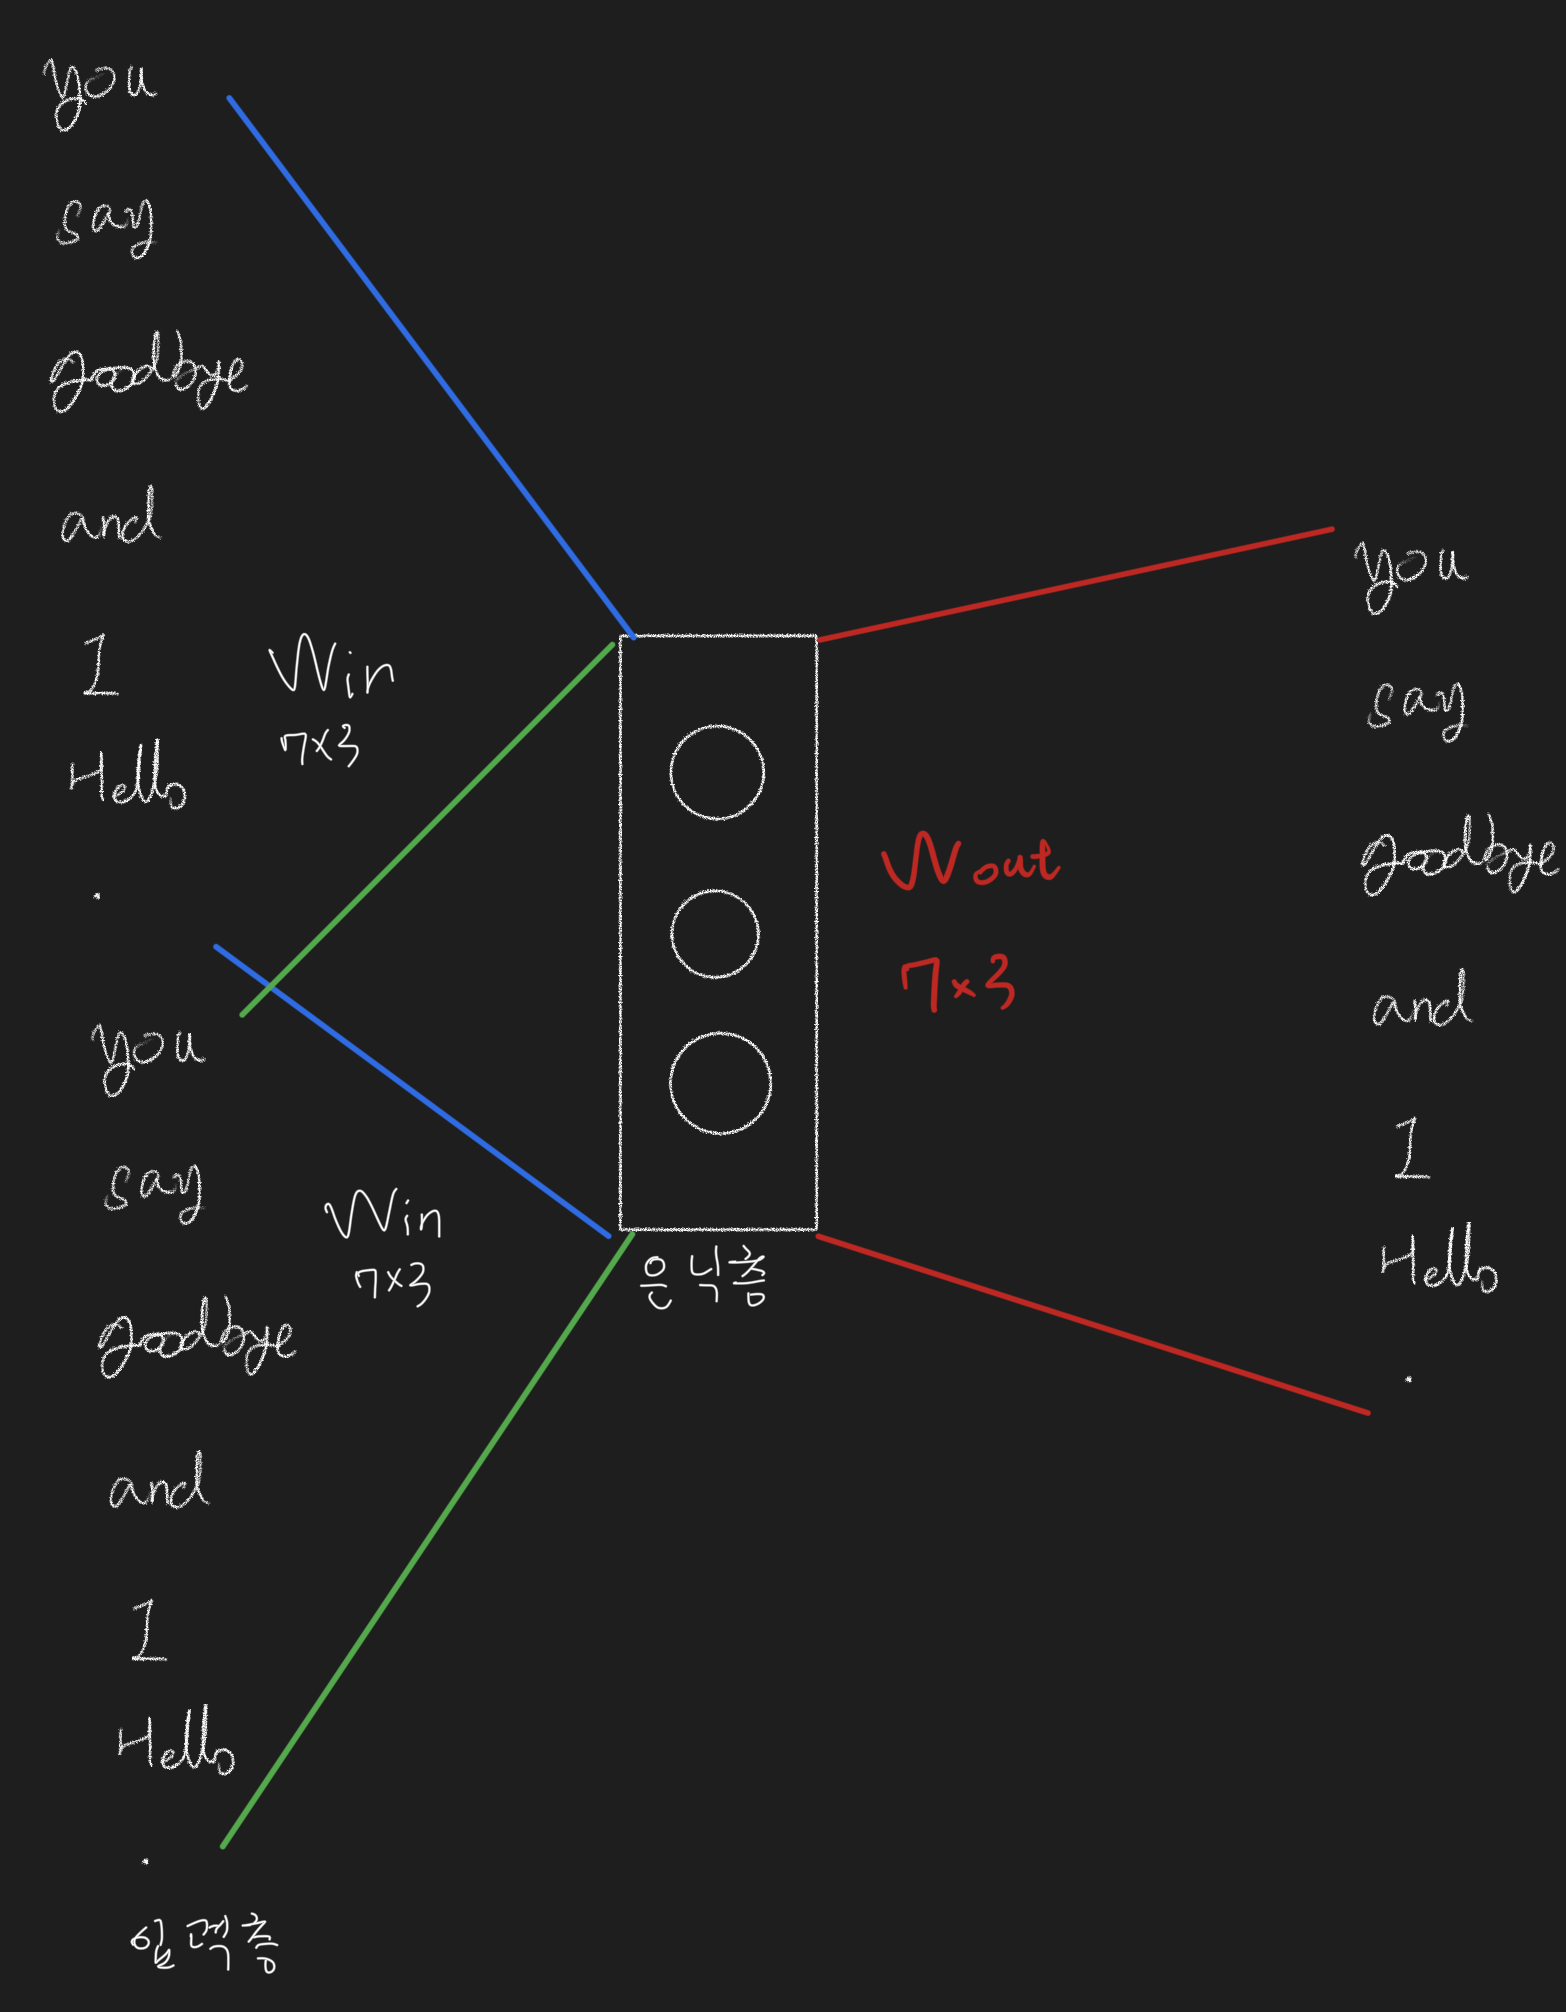

그림이 CBOW모델의 신경망이다. 입력층이 2개 있고, 은닉층을 거쳐 출력층에 도달한다. 두 입력층에서 은닉층으로 변환은 똑같은 완전연결계층(가중치는$W_{in}$)이 처리한다. 은닉층에서 출력층으로 변환은 다른 완전연결계층(가중치는$W_{out}$)이 처리한다.

은닉층의 뉴런은 입력층의 완전연결계층에 의해 변환된 값이다. 입력층이 여러개이면 전체를 평균한다.　예를들어 첫번째 입력층 $h_{1}$으로 변환되고, 두 번째 입력층이 $h_{2}$로 변환 되었다고 하면 은닉층 뉴런은$\frac{1}{2}(h_{1}+h_{2})$가 된다.

그림에서 출력층의 뉴런은 총 7개이다. 이 뉴런 하나하나가 각각의 단어에 대응한다. 출력층 뉴런은 각 단어의 `점수`를 뜻한다. 값이 높을수록 대응 단어의 출현 확률도 높아진다.
점수는 확률로 해석되기 전의 값이고 이 점수에 소프트맥스 함수를 적용하여 확률로 변환한다.


**계층 관점에서 본 CBOW모델**

![image.png](attachment:image.png)

그림에서 알 수 있듯이 CBOW 모델의 가장 앞단에는 2개의 MatMul계층이 있고, 두 계층의 출력이 더해잔다. 그리고 0.5를 곱하면 평균이 되며 이 평균이 은닉층 뉴런이된다. 마지막으로 은닉층 뉴런에 또 다른 MatMul계층이 적용되며 점수가 출력된다.

**CBOW 모델의 추론 처리**

파이썬으로 구현한 CBOW모델의 추론 처리는 다음과 같다.


In [13]:
import sys
sys.path.append('..')

import numpy as np

class MatMul:
  def __init__(self, W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.x = None
    
  def forward(self, x):
    W, = self.params
    out = np.dot(x, W)
    self.x = x
    return out
  
  def backward(self, dout):
    W, = self.params
    dx = np.dot(dout, W.T)
    dW = np.dot(self.x.T, dout)
    self.grads[0][...] = dW
    return dx


# サンプルのコンテキストデータ
c0 = np.array([1, 0, 0, 0, 0, 0, 0])
c1 = np.array([0, 0, 1, 0, 0, 0, 0])

# 重みの初期化
# 7 X 3の行列 W_in, 3 X 7の行列 W_outを生成する理由は、
# 入力層のノード数が7、中間層のノード数が3、出力層のノード数が7だからです。
# また、マトリックスの積を計算するために、W_inの列数とW_outの行数を一致させる必要があります。
W_in = np.random.randn(7, 3) # 入力層の重み
W_out = np.random.randn(3, 7) # 出力層の重み


# レイヤの生成
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 順伝播
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(f"Score: {s}")

def softmax(x):
  if x.ndim == 2:
    x = x - x.max(axis=1, keepdims=True)
    x = np.exp(x)
    x /= x.sum(axis=1, keepdims=True)
  elif x.ndim == 1:
    x = x - np.max(x)
    x = np.exp(x) / np.sum(np.exp(x))

  return x

# ソフトマックス関数
class Softmax:
  def __init__(self):
    self.params, self.grads = [], []
    self.out = None
    
  def forward(self, x):
    self.out = softmax(x)
    return self.out
  
  def backward(self, dout):
    dx = self.out * dout
    sumdx = np.sum(dx, axis=1, keepdims=True)
    dx -= self.out * sumdx
    return dx
  
# 소프트맥스 계층으로 확률을 계산한다.
# 확률을 계산할 때는 소프트맥스 계층의 forward 메서드를 호출하면 된다.
out_layer = Softmax()
out = out_layer.forward(s)
print(f"Probability: {out}")

Score: [ 3.07358322 -3.25096024 -1.29223374  2.56624847 -3.85339904 -0.96545291
  0.73919225]
Probability: [5.77347504e-01 1.03448208e-03 7.33477980e-03 3.47619885e-01
 5.66352893e-04 1.01696543e-02 5.59273419e-02]


### 3.2.2 CBOW 모델의 학습

[?]모델은 다중 클래스 분류를 수행하는 신경망이다. 신경망을 학습하려면 소프트맥스와 교차 엔트로피 오차만을 이용하면 된다. 소프트맥스 함수를 이용해 점수를 확률로 변환하고, 그 확률과 정답 레이블로부터 교차 엔트로피 오차를 구한다. 그 값을 손실로 사용하여 신경망을 학습한다.

### 3.2.3 word2vec의 가중치와 분산 표현

신경망에는 두 가지 가중치가 있다. 입력 측 완전연결계층의 가중치($W_{in}$)와 출력 측 완전연결계층의 가중치($W_{out}$)이다.

입력층 가중치 $W_{in}$의 각 행이 각 단어의 분산 표현이다.

출력 측 가중치 $W_{out}$에도 단어의 의미가 인코딩된 벡터가 저장되어 있다고 생각할 수 있다.

## 3.3 학습 데이터 준비

### 3.3.1 맥락과 타깃

word2vec에서 이용하는 신경망의 입력은 '맥락'이다. 맥락이란 타깃을 둘러싼 단어를 뜻한다.
그 정답 레이블은 맥락에 둘러 싸인 중앙의 단어, 즉 '타깃'이다.

신명망에 '맥락'을 입력했을 때 '타깃'이 출현할 확률을 높이는 것이 목표이다.

In [4]:
def preprocess(text: str) -> tuple:
  """문장을 단어 ID 목록, 단어 ID 사전, ID 단어 사전으로 변환

  Args:
      text (str): 변환할 문장

  Returns:
      tuple: 단어 ID 목록, 단어 ID 사전, ID 단어 사전
  """
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')
  
  word_to_id = {}
  id_to_word = {}
  
  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word
      
  corpus = np.array([word_to_id[w] for w in words])
  
  return corpus, word_to_id, id_to_word

In [5]:
def create_contexts_target(corpus, window_size=1):
  """コンテキストとターゲットの作成

  Args:
      corpus (array): コーパス（単語IDのリスト）
      window_size (int, optional): 윈도우 사이즈. Defaults to 1.

  Returns:
      _type_: _description_
  """
  target = corpus[window_size:-window_size]
  contexts = []
  
  for idx in range(window_size, len(corpus) - window_size):
    cs = []
    
    for t in range(-window_size, window_size + 1):
      if t ==0:
        continue
      cs.append(corpus[idx + t])
    contexts.append(cs)
  return np.array(contexts), np.array(target)

In [6]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(word_to_id)
print(id_to_word)

contexts, target = create_contexts_target(corpus, window_size=1)
print(contexts)

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]


### 3.3.2 원핫 표현으로 변환

In [7]:
import sys
sys.path.append('..')
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
print(contexts)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


## 3.4 CBOW 모델 구현


In [8]:
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
  def __init__(self, vocab_size, hidden_size):
    V, H = vocab_size, hidden_size
    
    # initialize weights
    W_in = 0.01 * np.random.randn(V,H).astype('f') # 入力層の重み
    W_out = 0.01 * np.random.randn(H,V).astype('f')# 出力層の重み
    
    # create layers
    self.in_layer0 = MatMul(W_in)
    self.in_layer1 = MatMul(W_in)
    self.out_layer = MatMul(W_out)
    self.loss_layer = SoftmaxWithLoss()
    
    # collect all weights and grads in list
    self.params, self.grads = [], []
    for layer in [self.in_layer0, self.in_layer1, self.out_layer]:
      self.params += layer.params
      self.grads += layer.grads
      
    # set word vector to member variable
    self.word_vecs = W_in
    
  def forward(self, contexts, target):
    h0 = self.in_layer0.forward(contexts[:, 0])
    h1 = self.in_layer1.forward(contexts[:, 1])
    h = (h0 + h1) * 0.5 # 평균을 구함 가중치가 2개이므로 0.5를 곱함 !!!
    score = self.out_layer.forward(h)
    loss = self.loss_layer.forward(score, target)
    return loss
  
  def backward(self, dout=1):
    ds = self.loss_layer.backward(dout)
    da = self.out_layer.backward(ds)
    da *= 0.5
    self.in_layer1.backward(da)
    self.in_layer0.backward(da)
    return None

### 3.4.1 학습 코드 구현

CBOW델의 학습으 일반적신경망의 학습과 완전히같다.

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

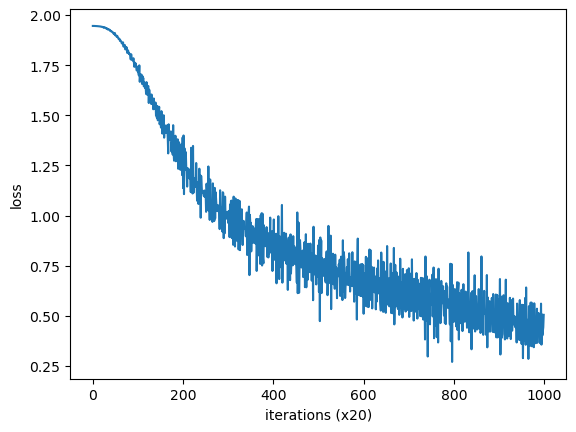

In [10]:
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [11]:
for word_id, word in id_to_word.items():
  print(word, model.word_vecs[word_id])

you [-1.0681683  -0.8273249  -0.9686455   0.87005645 -1.745406  ]
say [ 1.1544486   1.153588    1.1292195  -0.46769878 -1.2688503 ]
goodbye [-0.86221176 -1.1377355  -1.0154607   0.97977567  0.05989507]
and [ 0.7920619   0.74915475  0.60013413 -1.9222062  -1.2423348 ]
i [-0.84952056 -1.1007361  -1.0072693   0.9670496   0.03924409]
hello [-1.0807799  -0.81618303 -0.9559626   0.8743086  -1.7403849 ]
. [ 1.1656342  1.211147   1.2339985  1.8398688 -0.8902822]


## 3.5 word2vec 보충

### 3.5.1 CBOW 모델과 확률

동시 확률: $P(A, B)$
사후 확률: $P(A|B)$

CBOW의 확률 기법
$$
P(w_{t} | w_{t-1}, w_{t+1})
$$

위 식은 '$w_{t-1}$과 $w_{t+1}$이 주어졌을 때 $w_{t}$가 일어날 확률'을 나타낸다. 

그리고 '$W_{t-1}$과 $w_{t+1}$이 주어졌을 때 $w_{t}$가 일어날 확률'로 해석할 수 있다. 

CBOW는 위 식을 모델링 하고 있다.

CBOW 모델의 손실 함수는 $L = -\log P(w_{t} | w_{t-1}, w_{t+1})$이다. 이 식을 말뭉치 전체에 대해 확률의 곱으로 나타내면 다음과 같다.
$$
L = -\frac{1}{T} \sum_{t=1}^{T} \log P(w_{t} | w_{t-1}, w_{t+1})
$$

> CBOW모델의 학습이 수행하는 일은 이 손실함수의 값을 가능한 작게 만드는 것이다.
> 
> 그리고 이때의 가중치 매개변수가 우리가 얻고자 하는 단어의 분산 표현이다.


### 3.5.2 skip-gram 모델

word2vec에는 CBOW모델 외에도 'skip-gram'모델이 있다. skip-gram모델은 CBOW에서 다루는 맥락과 타깃을 역전시킨 모델이다.

$$
P(w_{t-1}, w_{t+1} | w_{t})
$$

'$w_{t}$가 주어졌을 때 $w_{t-1}$과 $w_{t+1}$이 동시에 일어날 확률'을 나타낸다. skip-gram모델에서는 맥락의 단어들 사이에 관련성이 없다고 가정한다.
$$
P(w_{t-1}, w_{t+1} | w_{t}) = P(w_{t-1} | w_{t})P(w_{t+1} | w_{t})
$$

교차 엔트로피 오차에 적용하여 skip-gram모델의 손실 함수를 유도할 수 있다.

$$
L = -logP(w_{t-1}, w_{t+1} | w_{t}) \\
= -logP(w_{t-1} | w_{t})P(w_{t+1} | w_{t}) \\
= -logP(w_{t-1} | w_{t}) + logP(w_{t+1} | w_{t})
$$

이 유도 과정에서는 $logxy = logx + logy$라는 로그의 성질을 이용했다.

말뭉치 전체에 대한 손실 함수는 다음과 같다.
$$
L = -\frac{1}{T} \sum_{t=1}^{T} \log P(w_{t-1} | w_{t}) + \log P(w_{t+1} | w_{t})
$$

In [12]:
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 重みの初期化
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # レイヤの生成
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # すべての重みと勾配をリストにまとめる
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # メンバ変数に単語の分散表現を設定
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 3.88
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 3.88
| epoch 21 |  iter 1 / 2 | ti

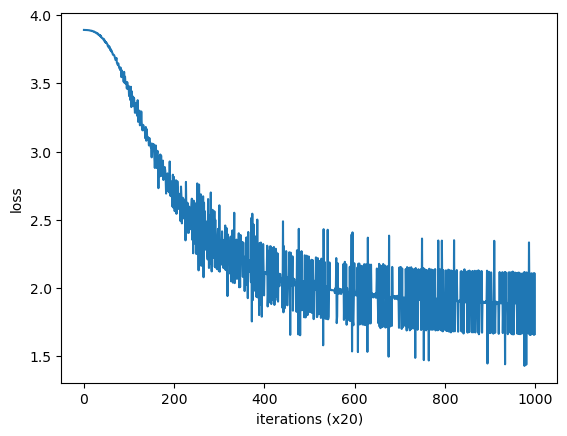

In [13]:
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()